<a href="https://colab.research.google.com/github/alirezaghl/Computational_Neuroscience_Projects/blob/main/LIF_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math

Exponential Decay

In [2]:
t = 0.0
dt = 1.0/100.0
v = -10.0
v_rest = -60.0
tau = 2.0
v_t = []

In [3]:
while t < 10.0:
  v_t.append(v)
  v += (-(v-v_rest)/tau) * dt
  t += dt

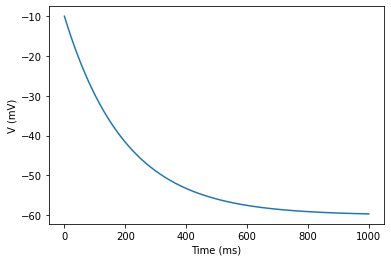

In [4]:
plt.plot(v_t)
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');

Simple LIF

In [5]:
class Simple_LIF:
    def __init__(self, V_th, V_reset, tau_m, g_L, V_init, V_L, T, dt):
        self.V_th = V_th # spike threshold [mV]
        self.V_reset = V_reset #reset potential [mV]
        self.tau_m = tau_m # membrane time constant [ms]
        self.g_L = g_L #leak conductance [nS]
        self.V_init= V_init # initial potential [mV]
        self.V_L = V_L #leak reversal potential [mV]
        self.T = T # Total duration of simulation [ms]
        self.dt = dt  # Simulation time step [ms]
        self.range_t = np.arange(0, self.T, self.dt) # Vector of discretized time points [ms]

    def run(self, I):

        time = self.range_t.size
        SpikeTimes = np.array([])
        V = np.zeros(time)
        V[0] = self.V_init
        I = I * np.ones(time)
        SpikeTimes=np.array([])

        for i in range(len(self.range_t)-1):
          dv = (-(V[i]-self.V_L) + I[i]/self.g_L) * (self.dt/self.tau_m) 
          V[i+1] = V[i] + dv
          
          if V[i+1] >= self.V_th:
            V[i+1] = self.V_reset
            SpikeTimes=np.append(SpikeTimes,self.range_t[i+1])

        return V, SpikeTimes      

In [6]:
LIF_s = Simple_LIF(-55. , -75. , 10. , 10. , -65., -75. , 400. , .1)

In [7]:
v, spiketimes = LIF_s.run(I = 300.)

In [134]:
def membrane_potential_plotter(time_range, voltage):
    plt.plot(time_range, voltage, color = "blue")
    plt.xlim(0, 400)
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    plt.show()

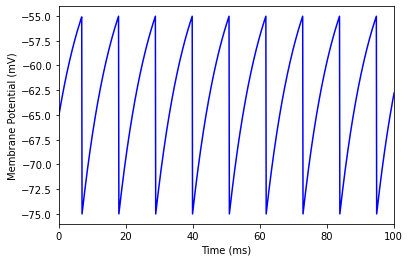

In [9]:
membrane_potential_plotter(LIF_s.range_t, v)

Adaptive LIF

In [71]:
class Simple_Adaptive_LIF:
    def __init__(self, V_th, V_reset, tau_m, g_L, V_init, V_L, T, dt, a, b, w_init, delta_t):
        self.V_th = V_th # spike threshold [mV]
        self.V_reset = V_reset #reset potential [mV]
        self.tau_m = tau_m # membrane time constant [ms]
        self.g_L = g_L #leak conductance [nS]
        self.V_init= V_init # initial potential [mV]
        self.V_L = V_L #leak reversal potential [mV]
        self.T = T # Total duration of simulation [ms]
        self.dt = dt  # Simulation time step [ms]
        self.a = a
        self.b = b
        self.W_init = w_init
        self.delta_t = delta_t
        self.range_t = np.arange(0, self.T, self.dt) # Vector of discretized time points [ms]

    def run(self, I):

        time = self.range_t.size
        SpikeTimes = np.array([])
        V = np.zeros(time)
        V[0] = self.V_init
        W = np.zeros(time)
        W[0] = self.W_init
        I = I * np.ones(time)
        SpikeTimes=np.array([])

        for i in range(len(self.range_t)-1):
          dw = (self.a * (V[i]-self.V_L) - W[i]) * (self.dt/self.tau_m)
          W[i+1] = W[i] + dw
          dv = (
                -(V[i]-self.V_L) 
                + self.delta_t*math.exp((v[i] - self.V_th)/self.delta_t) 
                + I[i]/self.g_L 
                - W[i+1]/self.g_L
                ) * (self.dt/self.tau_m)
            
            #update the membrane potential
          V[i+1] = V[i] + dv
          
          if V[i+1] >= self.V_th:
            V[i+1] = self.V_reset
            SpikeTimes=np.append(SpikeTimes,self.range_t[i+1])
            W[i+1] = W[i+1] + self.b


        return V, SpikeTimes      

In [146]:
ALIF_s = Simple_Adaptive_LIF(-55. , -75. , 10. , 10. , -65., -75. , 400. , .1, 20., 3., 0., 1)

Creating function for a step current input

In [180]:
def Step_I(T,dt):
  range_T = np.arange(0, T, dt)
  Lt = (range_T).size
  I=np.zeros_like(range_T)
  I[(range_T>=100) & (range_T<=200)]=500
  return range_T, I

In [181]:
time, Ix = Step_I(400,.1)

<ipython-input-182-aa4d6f59c58f>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.0, 1.0, 'A')

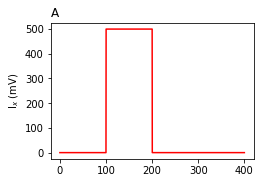

In [182]:
plt.subplots(figsize=(8, 2.5))

plt.subplot(1,2,1)
plt.plot(time,Ix,color='r')
#plt.xlabel('time (ms)')
plt.ylabel('I$_x$ (mV)')
plt.title('A',loc='left')

In [183]:
volt, spiketimes = ALIF_s.run(Ix)

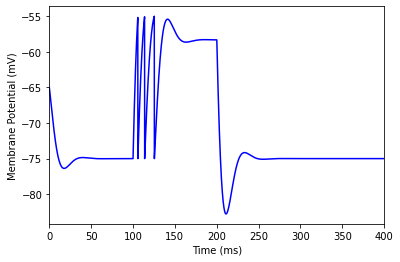

In [184]:
membrane_potential_plotter(ALIF_s.range_t, volt)